# 1. Import libraries

In [68]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import numpy as np

# 2. Import data

In [3]:
music_df = pd.read_csv('music_project_cleaned.csv')

In [4]:
print(music_df.head())

    user_id                        track            artist  genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile   rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg   rock   
2    20EC38            Funiculì funiculà       Mario Lanza    pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice   folk   
4  E2DC1FAE                  Soul People        Space Echo  dance   

          city                 time        day  
0  Shelbyville  1900-01-01 20:28:33  Wednesday  
1  Springfield  1900-01-01 14:07:09     Friday  
2  Shelbyville  1900-01-01 20:58:07  Wednesday  
3  Shelbyville  1900-01-01 08:37:09     Monday  
4  Springfield  1900-01-01 08:34:34     Monday  


# 3. Initial plotting

## 3.1 Genres by city

In [65]:
#Filter genres by city
genres_by_city = (music_df.groupby(['city','genre'])['user_id']
                  .nunique()
                  .reset_index(name='num_users')
                  .sort_values(by='num_users',ascending=False))

#Get top 10 genres for each city
genres_sprg = (genres_by_city[genres_by_city['city']=='Springfield']
               .sort_values(by='num_users', ascending=False)
               .head(10))
genres_shlb = (genres_by_city[genres_by_city['city']=='Shelbyville']
               .sort_values(by='num_users', ascending=False)
               .head(10))

#Print top 3
print(f'Top 3 genres in Springfield: {", ".join(genres_sprg["genre"].head(3))}')
print(f'Top 3 genres in Shelbyville: {", ".join(genres_shlb["genre"].head(3))}')

Top 3 genres in Springfield: pop, dance, rock
Top 3 genres in Shelbyville: pop, rock, dance


Pop, dance and rock are the three main genres in both Springfield and Shelbyville, even though in a different order.

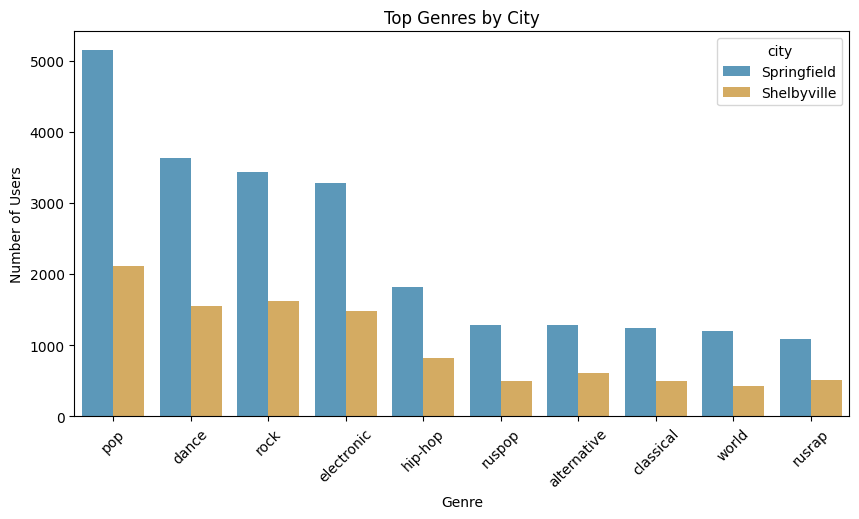

In [69]:
#Combine both dataframes
genres_by_city = (pd.merge(genres_sprg, genres_shlb, how='outer') 
                  #outer join to keep all genres
                  .sort_values(by='num_users', ascending=False)
                  .reset_index(drop=True))

#Plot the top genres by city
plt.figure(figsize=(10,5)) #Define plot size
sns.barplot(data=genres_by_city, x='genre', y='num_users', hue='city', 
            palette='colorblind', alpha=0.7
            ) #Create bar plot
#Customize the plot
plt.title('Top Genres by City')
plt.xlabel('Genre')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show() #Display the plot

## 3.2 Musics by day and city